# Filtros Anti-Aliasing

Primeiro, importamos as bibliotecas numpy, scipy e matplotlib.
Em seguida, definimos os parâmetros do filtro, incluindo a frequência de corte e a ordem do filtro.

Usando a função signal.iirfilter() da biblioteca scipy, criamos a função de transferência do filtro.

Em seguida, usamos a função signal.freqs() para calcular a resposta em frequência do filtro.

Para plotar a resposta em frequência, convertemos a magnitude para dB usando a função 20 * np.log10(abs(h)).

Por fim, usamos a função plt.semilogx() para plotar a magnitude em dB em função da frequência em Hz.

Você pode ajustar os parâmetros do filtro e a faixa de frequência para atender às suas necessidades específicas.

In [4]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, absolute, arange, abs, linspace, size, array, append, concatenate, real
from plotly import __version__

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

#Projetando o filtro Anti-Aliasing

In [5]:
# Definindo os parâmetros do filtro
# fDBP   => Frequência em [Hz] Desejada para a Banda escolhida.
# ordem  => Ordem do Filtro.
# ampMax => Atenuação máxima entre 0 a 1 aceitável da Amplitude.
# ampMin => Atenuação mínima entre 0 a 1 necessária da Amplitude.

def findFilterAnalog(fDBP,ordem,isBP=True,ampMax=0.95,ampMin=0.05):
  condition = (ampMax if isBP==True else ampMin)
  aux = (np.linspace(fDBP, fDBP*10, 1000) if isBP==True else np.linspace(1, fDBP, 1000))
  for fc in aux:
    # Criando a função de transferência do filtro
    b, a = signal.iirfilter(ordem, 2*pi*fc, btype='lowpass', analog=True, output='ba', ftype='butter')
    # Calculando a resposta em frequência do filtro
    w, haux = signal.freqs(b, a, worN=np.linspace(0, 2*pi*fc*10, 100000))
    h = abs(haux)
    for i in range(size(h)):
      if h[i] <= condition: break;
    if abs(w[i]) >= 2*pi*fDBP: break;
  f =  w/(2*pi) #Transformando a frequencia de rad/s para Hz
  if isBP==True:  
    fmax = f[i] 
  else: 
    fmin = f[i]
  condition = (ampMin if isBP==True else ampMax)
  for i in range(size(h)):
    if h[i] <= condition: break;
  if isBP==True:  
    fmin = f[i]
  else: 
    fmax = f[i]    
  return f,h,fmax,fc,fmin

#Plotando a resposta em frequência do filtro

---



'Frequência de atenuação máxima aceitável da Amplitude [Vermelho]: 60.13011481466167'

'Frequência de corte [Verde]: 104.86486486486487'

'Frequência de atenuação mínima necessária da Amplitude [Amarelo]: 468.6772273128138'

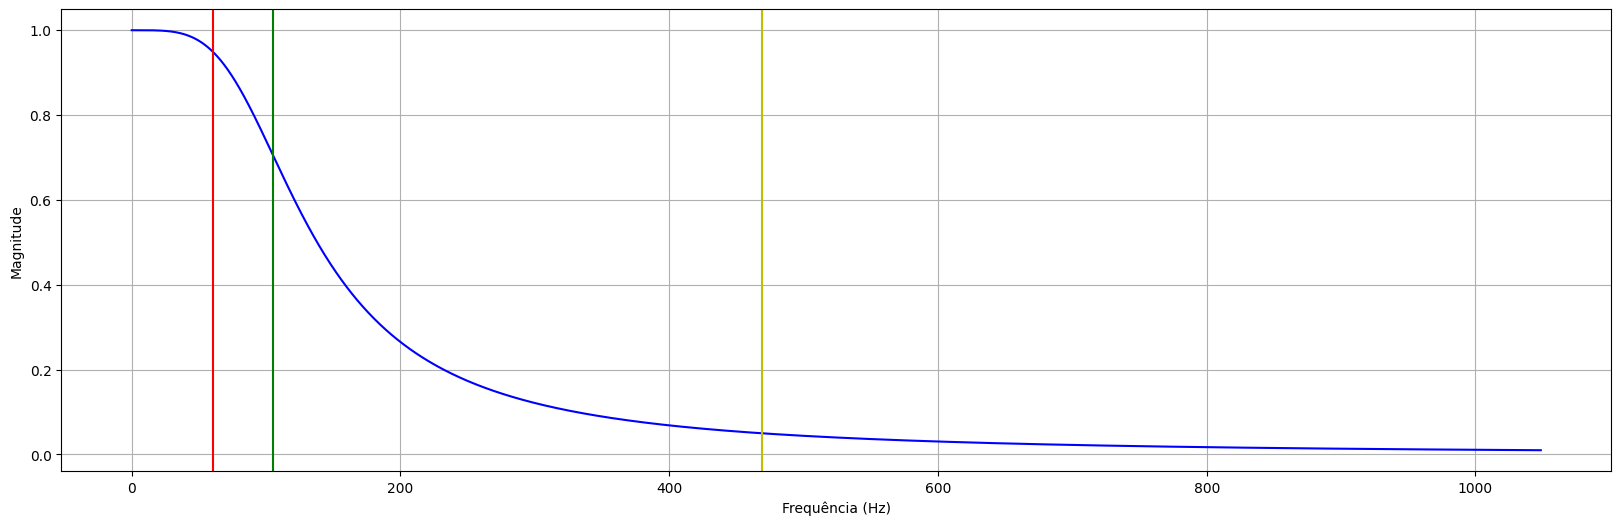

In [6]:
f,h,fmax,fc,fmin = findFilterAnalog(60,2)
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Magnitude')
ax1.plot(f, h, 'b')
display("Frequência de atenuação máxima aceitável da Amplitude [Vermelho]: " + str(fmax));
ax1.axvline(fmax,color='r');
display("Frequência de corte [Verde]: " + str(fc));
ax1.axvline(fc,color='g');
display("Frequência de atenuação mínima necessária da Amplitude [Amarelo]: "+ str(fmin));
ax1.axvline(fmin,color='y');
ax1.grid()
plt.show()